# Fruit 360 classification

We'll work with [Fruits 360 dataset](https://www.kaggle.com/datasets/moltean/fruits) from kaggle.



In [ ]:
import os
import pathlib

import numpy as np

from tqdm import tqdm
import cv2                                 
from sklearn.utils import shuffle  

import pandas as pd
import matplotlib.pyplot as plt   

import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, Dropout, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix        

import seaborn as sn; sn.set(font_scale=1.4) 


# Import and preprocess the data

## Import the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! unzip "/content/drive/MyDrive/Artificial Neural Networks' Data/Fruits 360 dataset/Fruits 360 - 20 classes".zip

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: Training/Guava/r_230_100.jpg  
  inflating: Training/Guava/r_231_100.jpg  
  inflating: Training/Guava/r_232_100.jpg  
  inflating: Training/Guava/r_233_100.jpg  
  inflating: Training/Guava/r_234_100.jpg  
  inflating: Training/Guava/r_235_100.jpg  
  inflating: Training/Guava/r_236_100.jpg  
  inflating: Training/Guava/r_237_100.jpg  
  inflating: Training/Guava/r_238_100.jpg  
  inflating: Training/Guava/r_239_100.jpg  
  inflating: Training/Guava/r_23_100.jpg  
  inflating: Training/Guava/r_240_100.jpg  
  inflating: Training/Guava/r_241_100.jpg  
  inflating: Training/Guava/r_242_100.jpg  
  inflating: Training/Guava/r_24_100.jpg  
  inflating: Training/Guava/r_253_100.jpg  
  inflating: Training/Guava/r_25_100.jpg  
  inflating: Training/Guava/r_26_100.jpg  
  inflating: Training/Guava/r_27_100.jpg  
  inflating: Training/Guava/r_28_100.jpg  
  inflating: Training/Guava/r_290_100.jpg  
  inflating: Training/Guava

> 🔑 **Note:** If you're using Google Colab and your runtime disconnects, you may have to redownload the files. You can do this by rerunning the cell above.

### Overview the data structure

`ls` stands for list.

In [ ]:
!ls Training

'Apple Granny Smith'   Banana		  'Grape White'   Mango    Pineapple
'Apple Red 1'	      'Cherry Wax Black'   Guava	  Orange   Pomegranate
 Apricot	       Fig		   Kiwi		  Peach    Strawberry
 Avocado	      'Grapefruit Pink'    Mandarine	  Pear	   Watermelon


In [ ]:
!ls Training/'Apple Red 1'

0_100.jpg    188_100.jpg  277_100.jpg	 r_144_100.jpg	r_233_100.jpg
100_100.jpg  189_100.jpg  278_100.jpg	 r_145_100.jpg	r_234_100.jpg
10_100.jpg   190_100.jpg  279_100.jpg	 r_146_100.jpg	r_235_100.jpg
101_100.jpg  19_100.jpg   280_100.jpg	 r_147_100.jpg	r_236_100.jpg
102_100.jpg  191_100.jpg  28_100.jpg	 r_148_100.jpg	r_237_100.jpg
103_100.jpg  192_100.jpg  281_100.jpg	 r_149_100.jpg	r_238_100.jpg
104_100.jpg  193_100.jpg  282_100.jpg	 r_150_100.jpg	r_239_100.jpg
105_100.jpg  194_100.jpg  283_100.jpg	 r_15_100.jpg	r_240_100.jpg
106_100.jpg  195_100.jpg  284_100.jpg	 r_151_100.jpg	r_24_100.jpg
107_100.jpg  196_100.jpg  285_100.jpg	 r_152_100.jpg	r_241_100.jpg
108_100.jpg  197_100.jpg  286_100.jpg	 r_153_100.jpg	r_242_100.jpg
109_100.jpg  198_100.jpg  287_100.jpg	 r_154_100.jpg	r_243_100.jpg
1_100.jpg    199_100.jpg  288_100.jpg	 r_155_100.jpg	r_244_100.jpg
110_100.jpg  200_100.jpg  289_100.jpg	 r_156_100.jpg	r_245_100.jpg
11_100.jpg   20_100.jpg   290_100.jpg	 r_157_100.jpg	r_246_100.jp

In [ ]:
# Walk through Test directory and list number of files
for dirpath, dirnames, filenames in os.walk("Test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 20 directories and 0 images in 'Test'.
There are 0 directories and 166 images in 'Test/Banana'.
There are 0 directories and 160 images in 'Test/Orange'.
There are 0 directories and 164 images in 'Test/Cherry Wax Black'.
There are 0 directories and 234 images in 'Test/Fig'.
There are 0 directories and 164 images in 'Test/Apple Red 1'.
There are 0 directories and 164 images in 'Test/Peach'.
There are 0 directories and 166 images in 'Test/Pineapple'.
There are 0 directories and 164 images in 'Test/Apricot'.
There are 0 directories and 164 images in 'Test/Pomegranate'.
There are 0 directories and 166 images in 'Test/Mandarine'.
There are 0 directories and 166 images in 'Test/Mango'.
There are 0 directories and 164 images in 'Test/Apple Granny Smith'.
There are 0 directories and 164 images in 'Test/Pear'.
There are 0 directories and 166 images in 'Test/Guava'.
There are 0 directories and 166 images in 'Test/Grapefruit Pink'.
There are 0 directories and 143 images in 'Test/Avocado'

In [ ]:
# Another way to find out how many images are in a file
num_specific_class_train = len(os.listdir("Training/Peach"))
num_specific_class_train

492

In [ ]:
train_dir = "Training"
test_dir = "Test"

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path(train_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Apple Granny Smith' 'Apple Red 1' 'Apricot' 'Avocado' 'Banana'
 'Cherry Wax Black' 'Fig' 'Grape White' 'Grapefruit Pink' 'Guava' 'Kiwi'
 'Mandarine' 'Mango' 'Orange' 'Peach' 'Pear' 'Pineapple' 'Pomegranate'
 'Strawberry' 'Watermelon']


In [ ]:
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (100, 100)
INPUT_TENSOR = (100, 100, 3)

### Load the data

In [ ]:
def load_data():
    """
        Load the data:
            - 9,915 images to train the network.
            - 3,324 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['Training', 'Test']
    output = []
    train_mode = True

    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        if train_mode:
          images, labels = shuffle(images, labels, random_state=25)
          train_mode = False
        
        images = images / 255.0
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading Training


100%|██████████| 492/492 [00:00<00:00, 2639.44it/s]


Loading Test


100%|██████████| 164/164 [00:00<00:00, 4124.49it/s]


In [ ]:
tf.random.set_seed(42)
train_images, train_labels = shuffle(train_images, train_labels, random_state=427)

### Analyze the data

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 9915
Number of testing examples: 3324
Each image is of size: (100, 100)


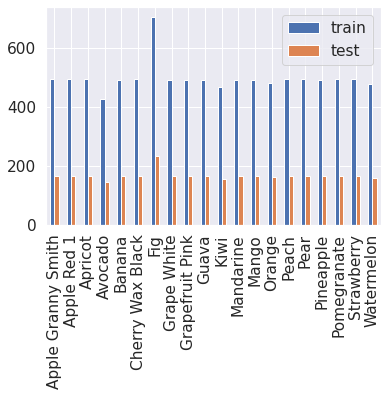

In [ ]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

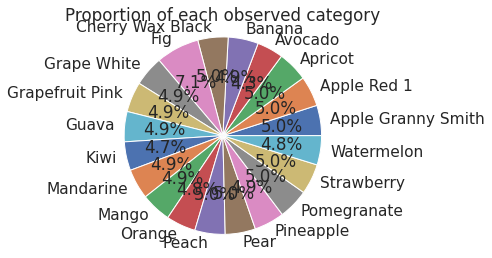

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

### View the data 

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

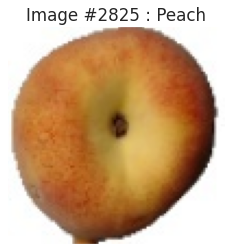

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

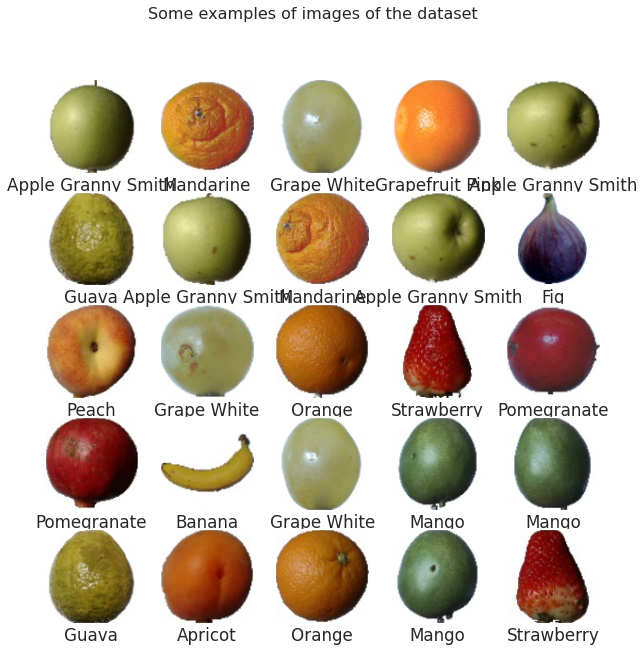

In [ ]:
display_examples(class_names, train_images, train_labels)

# Create, train, evaluate a model

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot loss function
    plt.subplot(221)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(222)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.show()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_1 = Sequential([
  Conv2D(16, 3, input_shape=(100, 100, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPool2D(),
  Flatten(),
  Dense(120),
  Activation('relu'),
  Dense(20), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_images, train_labels, batch_size=32, epochs=5, validation_split = 0.2)

Epoch 1/5
248/248 [==============================] - 18s 18ms/step - loss: 0.3736 - accuracy: 0.9139 - val_loss: 2.2890 - val_accuracy: 0.3056
Epoch 2/5
248/248 [==============================] - 3s 10ms/step - loss: 0.0036 - accuracy: 0.9997 - val_loss: 0.0229 - val_accuracy: 0.9950
Epoch 3/5
248/248 [==============================] - 3s 10ms/step - loss: 9.9240e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4/5
248/248 [==============================] - 3s 10ms/step - loss: 6.0595e-04 - accuracy: 1.0000 - val_loss: 4.3562e-04 - val_accuracy: 1.0000
Epoch 5/5
248/248 [==============================] - 3s 12ms/step - loss: 3.4295e-04 - accuracy: 1.0000 - val_loss: 2.8281e-04 - val_accuracy: 1.0000


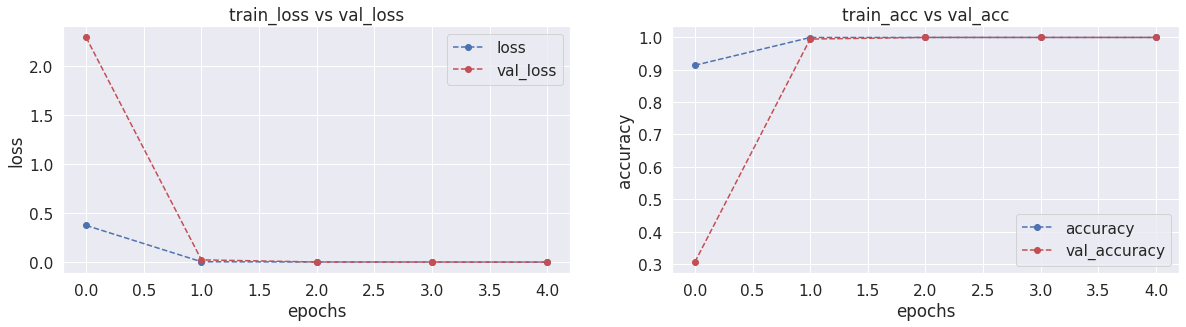

In [ ]:
# Check out model's performance
plot_accuracy_loss(history_1)

In [ ]:
test_loss_1 = model_1.evaluate(test_images, test_labels)

104/104 [==============================] - 1s 8ms/step - loss: 0.0172 - accuracy: 0.9961


# Experimenting 

## Introducing Dropout Layers (standard for next models)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_2 = Sequential([
  Conv2D(8, 3, input_shape=(100, 100, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(20), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_images, train_labels, batch_size=32, epochs=5, validation_split = 0.2)

Epoch 1/5
248/248 [==============================] - 8s 18ms/step - loss: 0.9907 - accuracy: 0.7002 - val_loss: 2.2651 - val_accuracy: 0.2920
Epoch 2/5
248/248 [==============================] - 4s 15ms/step - loss: 0.1492 - accuracy: 0.9510 - val_loss: 0.0533 - val_accuracy: 0.9889
Epoch 3/5
248/248 [==============================] - 3s 13ms/step - loss: 0.0765 - accuracy: 0.9760 - val_loss: 0.0277 - val_accuracy: 0.9939
Epoch 4/5
248/248 [==============================] - 3s 13ms/step - loss: 0.0513 - accuracy: 0.9827 - val_loss: 0.0356 - val_accuracy: 0.9854
Epoch 5/5
248/248 [==============================] - 3s 14ms/step - loss: 0.0460 - accuracy: 0.9863 - val_loss: 0.0110 - val_accuracy: 0.9970


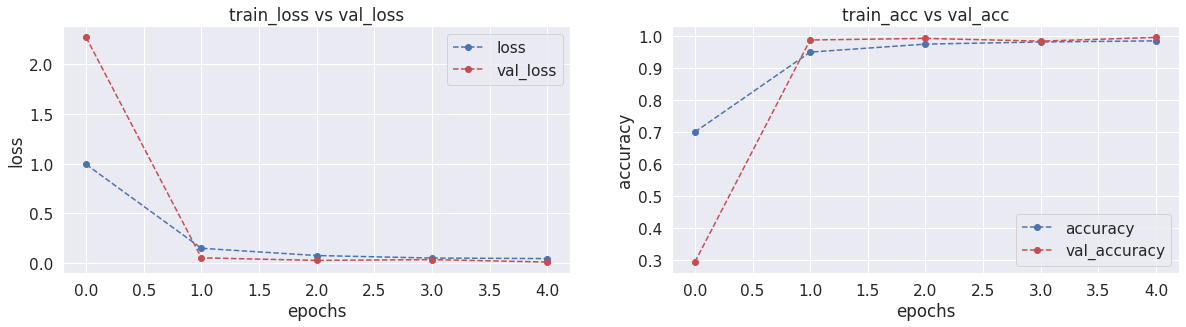

In [ ]:
plot_accuracy_loss(history_2)

In [ ]:
test_loss_2 = model_2.evaluate(test_images, test_labels)

104/104 [==============================] - 1s 8ms/step - loss: 0.1050 - accuracy: 0.9555


## Data augmentation

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_images_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(100, 100),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

test_images_augmented = test_datagen.flow_from_directory(test_dir, 
                                                target_size=(100, 100),
                                                batch_size=32,
                                                class_mode='categorical')

Found 9915 images belonging to 20 classes.
Found 3324 images belonging to 20 classes.


In [ ]:
train_images_augmented

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_3 = Sequential([
  Conv2D(8, 3, input_shape=(100, 100, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(20), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_images_augmented, epochs=5, steps_per_epoch=len(train_images_augmented), validation_data=test_images_augmented, validation_steps=len(test_images_augmented))

Epoch 1/5
310/310 [==============================] - 45s 135ms/step - loss: 1.6689 - accuracy: 0.4528 - val_loss: 4.2704 - val_accuracy: 0.1977
Epoch 2/5
310/310 [==============================] - 41s 132ms/step - loss: 0.5312 - accuracy: 0.8098 - val_loss: 0.4540 - val_accuracy: 0.8186
Epoch 3/5
310/310 [==============================] - 39s 126ms/step - loss: 0.3224 - accuracy: 0.8906 - val_loss: 0.5114 - val_accuracy: 0.8090
Epoch 4/5
310/310 [==============================] - 39s 125ms/step - loss: 0.2542 - accuracy: 0.9133 - val_loss: 0.2167 - val_accuracy: 0.9116
Epoch 5/5
310/310 [==============================] - 40s 130ms/step - loss: 0.1989 - accuracy: 0.9358 - val_loss: 0.1352 - val_accuracy: 0.9395


You can see each epoch takes longer than the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, in turn, increasing the amount of time between each epoch.

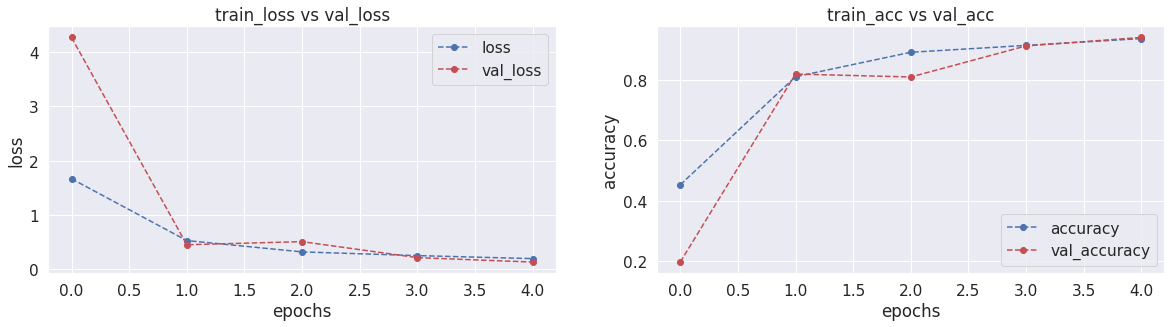

In [ ]:
# Check out model's performance with augmented data
plot_accuracy_loss(history_3)

That's looking much better, the loss curves are much closer to each other. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

In [ ]:
test_loss_3 = model_3.evaluate(test_images_augmented)

104/104 [==============================] - 3s 29ms/step - loss: 0.1352 - accuracy: 0.9395


### Adding 1 convolutional and 1 dense layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_4 = Sequential([
  Conv2D(8, 3, input_shape=(100, 100, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(20), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_images, train_labels, batch_size=32, epochs=5, validation_split = 0.2)

Epoch 1/5
248/248 [==============================] - 10s 18ms/step - loss: 1.0453 - accuracy: 0.6508 - val_loss: 5.3341 - val_accuracy: 0.1326
Epoch 2/5
248/248 [==============================] - 3s 14ms/step - loss: 0.1382 - accuracy: 0.9570 - val_loss: 0.9032 - val_accuracy: 0.7650
Epoch 3/5
248/248 [==============================] - 4s 16ms/step - loss: 0.0647 - accuracy: 0.9808 - val_loss: 0.2612 - val_accuracy: 0.9259
Epoch 4/5
248/248 [==============================] - 4s 15ms/step - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.3695 - val_accuracy: 0.8795
Epoch 5/5
248/248 [==============================] - 3s 14ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0658 - val_accuracy: 0.9702


In [ ]:
plot_accuracy_loss(history_4)

In [ ]:
test_loss_4 = model_4.evaluate(test_images, test_labels)

### Adding 2 convolutional and 2 dense layers

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_5 = Sequential([
  Conv2D(8, 3, input_shape=(100, 100, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(128, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(), # flatten
  Dense(480),
  Activation('relu'),
  Dropout(0.1),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(20), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_images, train_labels, batch_size=32, epochs=5, validation_split = 0.2)

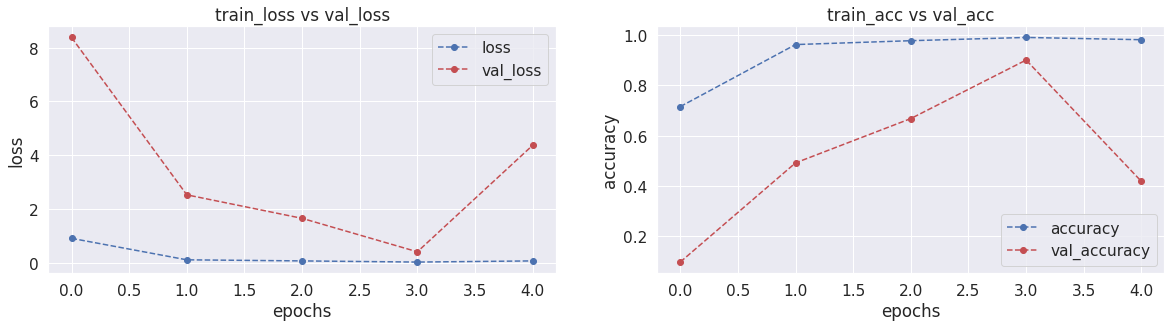

In [ ]:
plot_accuracy_loss(history_5)

In [ ]:
test_loss_5 = model_5.evaluate(test_images, test_labels)

### Increasing number of filters and number of neurons of the best model yet

In [ ]:
# Build the model
model_6 = Sequential([
  Conv2D(16, 3, input_shape=(100, 100, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(128, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(750),
  Activation('relu'),
  Dropout(0.1),
  Dense(150),
  Activation('relu'),
  Dropout(0.1),
  Dense(30),
  Activation('relu'),
  Dropout(0.1),
  Dense(20), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_6.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_images, train_labels, batch_size=32, epochs=5, validation_split = 0.2)

In [ ]:
plot_accuracy_loss(history_6)

In [ ]:
test_loss_6 = model_6.evaluate(test_images, test_labels)

104/104 [==============================] - 1s 6ms/step - loss: 0.2255 - accuracy: 0.9323


### Decreasing number of filters and number of neurons of the best model yet

In [ ]:
# Build the model
model_7 = Sequential([
  Conv2D(4, 3, input_shape=(100, 100, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(8, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(12),
  Activation('relu'),
  Dropout(0.1),
  Dense(20), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_7.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_images, train_labels, batch_size=32, epochs=5, validation_split = 0.2)

In [ ]:
plot_accuracy_loss(history_7)

In [ ]:
test_loss_7 = model_7.evaluate(test_images, test_labels)

### Changing dropout percentage of the best model yet

```
Dropout = 0.3
Epoch 1/5
439/439 [==============================] - 28s 62ms/step - loss: 1.5235 - accuracy: 0.3874 - val_loss: 1.7667 - val_accuracy: 0.1970
Epoch 2/5
439/439 [==============================] - 27s 61ms/step - loss: 1.0968 - accuracy: 0.5670 - val_loss: 1.4863 - val_accuracy: 0.4543
Epoch 3/5
439/439 [==============================] - 26s 60ms/step - loss: 0.9669 - accuracy: 0.6314 - val_loss: 1.4577 - val_accuracy: 0.5213
Epoch 4/5
439/439 [==============================] - 26s 59ms/step - loss: 0.8798 - accuracy: 0.6784 - val_loss: 1.3010 - val_accuracy: 0.6187
Epoch 5/5
439/439 [==============================] - 26s 59ms/step - loss: 0.8173 - accuracy: 0.7087 - val_loss: 1.3000 - val_accuracy: 0.5530
```

### Training for longer (more epochs) of the best model yet

In [ ]:
# Build the model
model_8 = Sequential([
  Conv2D(8, 3, input_shape=(100, 100, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(20), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_8.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_images, train_labels, batch_size=32, epochs=10, validation_split = 0.2)

Epoch 1/10
248/248 [==============================] - 9s 19ms/step - loss: 0.9962 - accuracy: 0.6892 - val_loss: 4.6269 - val_accuracy: 0.1553
Epoch 2/10
248/248 [==============================] - 3s 13ms/step - loss: 0.1248 - accuracy: 0.9607 - val_loss: 0.3428 - val_accuracy: 0.9067
Epoch 3/10
248/248 [==============================] - 3s 14ms/step - loss: 0.0488 - accuracy: 0.9835 - val_loss: 0.0801 - val_accuracy: 0.9763
Epoch 4/10
248/248 [==============================] - 3s 14ms/step - loss: 0.0230 - accuracy: 0.9936 - val_loss: 0.2497 - val_accuracy: 0.9163
Epoch 5/10
248/248 [==============================] - 4s 15ms/step - loss: 0.0731 - accuracy: 0.9808 - val_loss: 0.0684 - val_accuracy: 0.9823
Epoch 6/10
248/248 [==============================] - 3s 14ms/step - loss: 0.0257 - accuracy: 0.9927 - val_loss: 0.0154 - val_accuracy: 0.9985
Epoch 7/10
248/248 [==============================] - 3s 14ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.4621 - val_accuracy: 0.8966

In [ ]:
plot_accuracy_loss(history_8)

In [ ]:
test_loss_8 = model_8.evaluate(test_images, test_labels)

## Comparing our models' accuracies

In [ ]:
from tensorflow.python.ops.gen_math_ops import arg_max
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

m1 = history_1.history['val_accuracy'][4]
m2 = history_2.history['val_accuracy'][4]
m3 = history_3.history['val_accuracy'][4]
m4 = history_4.history['val_accuracy'][4]
m5 = history_5.history['val_accuracy'][4]
m6 = history_6.history['val_accuracy'][4]
m7 = history_7.history['val_accuracy'][4]
m8 = history_8.history['val_accuracy'][9]

model_results = [["model_1", m1],
                 ["model_2", m2],
                 ["model_3", m3],
                 ["model_4", m4],
                 ["model_5", m5],
                 ["model_6", m6],
                 ["model_7", m7],
                 ["model_8", m8]]
       
all_results = pd.DataFrame(model_results, columns=["model", "val_accuracy"])
all_results

,model,val_accuracy
0,model_1,1.000000
1,model_2,0.996974
2,model_3,0.939531
3,model_4,0.970247
4,model_5,0.418053
5,model_6,0.966717
6,model_7,0.988906
7,model_8,0.974281


## Training and saving the best model so far

## Model predictions

In [ ]:
predictions = model_1.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

## Error analysis

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

IndexError: ignored

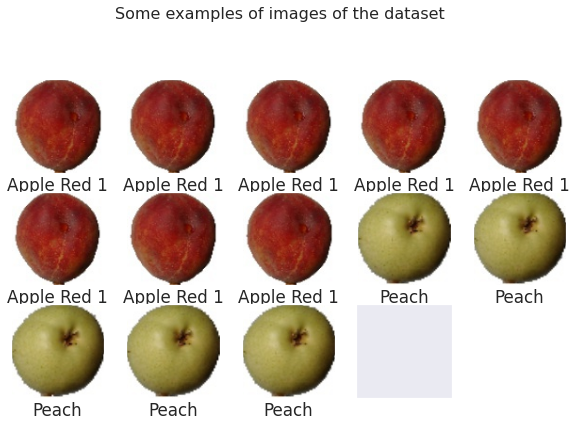

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

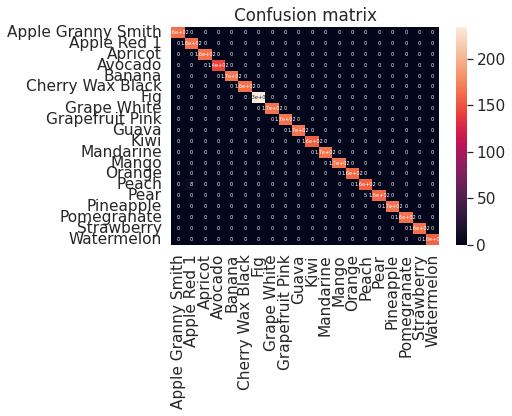

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 5}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()